In [15]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

standard_flag = True

# 训练

In [16]:
train_data = pd.read_excel('all_label.xlsx', header=None)
train_features = train_data.iloc[:, :8].values
train_labels = train_data.iloc[:, 8].values

# 数据标准化
if standard_flag:
    scaler = StandardScaler()
    train_features = scaler.fit_transform(train_features)
    train_features

train_features

array([[-0.31050763, -0.29997733, -0.3107326 , -0.29975724, -0.31047644,
        -0.29988487, -0.3106494 , -0.29982702],
       [-0.31267595, -0.30288742, -0.37885107, -0.37240046, -0.37906842,
        -0.37294388, -0.37869968, -0.3722429 ],
       [-0.37878324, -0.37217949, -0.31271255, -0.30261727, -0.37875623,
        -0.37252023, -0.3789449 , -0.3728418 ],
       [-0.37916866, -0.37284206, -0.37886652, -0.3722559 , -0.31264734,
        -0.30265426, -0.37861356, -0.37246065],
       [-0.3788375 , -0.37238837, -0.37904094, -0.37283493, -0.37875974,
        -0.37238396, -0.31298225, -0.30269582],
       [-0.3105092 , -0.29983546, -0.3107567 , -0.29963011, -0.31067444,
        -0.29962642, -0.31062004, -0.29964074],
       [-0.30909903, -0.29769034, -0.35574709, -0.37301583, -0.37924216,
        -0.37315638, -0.37826682, -0.35929743],
       [-0.37827697, -0.35918506, -0.30920155, -0.29729248, -0.35604659,
        -0.37324314, -0.37909493, -0.37286368],
       [-0.3789508 , -0.37270804

In [17]:
from sklearn.decomposition import PCA
# PCA降维
# 进行PCA降维
pca = PCA(n_components=2)  # 设置降维后的维度为2
features_pca = pca.fit_transform(train_features)
features_pca

array([[-8.63291488e-01, -7.04903385e-05],
       [-1.01460146e+00,  1.08140709e-02],
       [-1.01446451e+00,  6.64868712e-02],
       [-1.01450420e+00, -1.11629569e-02],
       [-1.01465847e+00, -6.63791891e-02],
       [-8.63107446e-01, -1.42458535e-04],
       [-9.98960628e-01,  1.67861316e-02],
       [-9.98857679e-01,  7.28673951e-02],
       [-9.98814930e-01, -1.67206085e-02],
       [-9.98785906e-01, -7.28633381e-02],
       [-6.97214234e-01, -5.42926091e-05],
       [-9.74961102e-01,  1.95307185e-02],
       [-9.74820149e-01,  1.19916847e-01],
       [-9.74838262e-01, -1.99047713e-02],
       [-9.75024439e-01, -1.19753716e-01],
       [-6.97338155e-01, -1.52996289e-04],
       [-9.45155367e-01,  3.04625428e-02],
       [-9.45043980e-01,  1.32962140e-01],
       [-9.45102988e-01, -3.04063829e-02],
       [-9.44962893e-01, -1.32931789e-01],
       [-6.42350515e-01, -4.89058476e-05],
       [-9.62048273e-01,  2.23649733e-02],
       [-9.61905803e-01,  1.37390434e-01],
       [-9.

In [18]:
# 创建KNN分类器
k = 2  # 降维后为2分类
knn = KNeighborsClassifier(n_neighbors=k, weights='distance')

# 训练
knn.fit(features_pca, train_labels)

KNeighborsClassifier(n_neighbors=2, weights='distance')

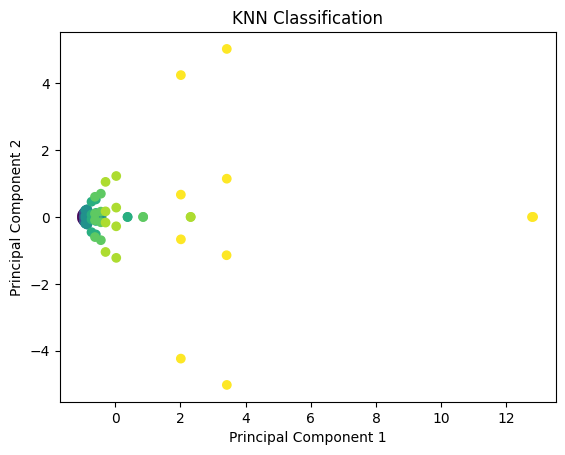

In [19]:
# PCA降维后的KNN分类可视化
predicted_labels = knn.predict(features_pca)

plt.scatter(features_pca[:, 0], features_pca[:, 1], c=predicted_labels, cmap='viridis')
plt.title('KNN Classification')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 测试

In [20]:
# 测试
test_data = pd.read_excel('test_label.xlsx', header=None)

test_features = test_data.iloc[:, :8].values
test_labels = test_data.iloc[:, 8].values
test_labels

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5,
       5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8], dtype=int64)

In [21]:
# 标准化
if standard_flag:
    test_features = scaler.transform(test_features)

In [22]:
from sklearn.decomposition import PCA
# PCA降维
# 进行PCA降维
pca = PCA(n_components=2)  # 设置降维后的维度为2
test_features_pca = pca.fit_transform(test_features)
test_features_pca

array([[-0.94522818, -0.05813901],
       [-0.9449617 , -0.04512254],
       [-0.94506114,  0.05822412],
       [-0.94526729,  0.04493352],
       [-0.8780493 , -0.10600698],
       [-0.87773586, -0.08231129],
       [-0.87783841,  0.10613591],
       [-0.87809084,  0.08209646],
       [-0.85585084, -0.121817  ],
       [-0.8555221 , -0.09459638],
       [-0.85562606,  0.12196012],
       [-0.85589345,  0.09437259],
       [-0.78968396, -0.16892445],
       [-0.78931023, -0.13120589],
       [-0.78941916,  0.16910923],
       [-0.78973043,  0.13095439],
       [-0.76774568, -0.18453849],
       [-0.76735721, -0.14334166],
       [-0.76746799,  0.18473692],
       [-0.76779361,  0.1430807 ],
       [-0.4426567 , -0.41574544],
       [-0.44205745, -0.32308434],
       [-0.44220134,  0.41614062],
       [-0.44273281,  0.3226736 ],
       [-0.2495146 , -0.55303231],
       [-0.24879441, -0.42982895],
       [-0.24896003,  0.55354204],
       [-0.24961076,  0.42932447],
       [ 0.34090503,

In [23]:
predicted_labels = knn.predict(test_features_pca)
predicted_labels

array([1, 1, 1, 1, 4, 3, 4, 3, 4, 4, 4, 4, 4, 5, 4, 5, 4, 5, 4, 5, 5, 6,
       5, 6, 6, 7, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8], dtype=int64)

In [24]:
predicted_scores = knn.predict_proba(test_features_pca)
predicted_scores

array([[0.        , 0.51360137, 0.48639863, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.58008202, 0.41991798, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.51257283, 0.48742717, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.58567407, 0.41432593, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.49750639, 0.50249361,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.51377428, 0.48622572,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.49734241, 0.50265759,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.51570835, 0.48429165,
        0.        , 0.        , 0.        , 0.        ],


In [25]:
correct = (predicted_labels == test_labels).sum().item()
total = len(test_data)
accuracy = correct / total
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 38.88888888888889%


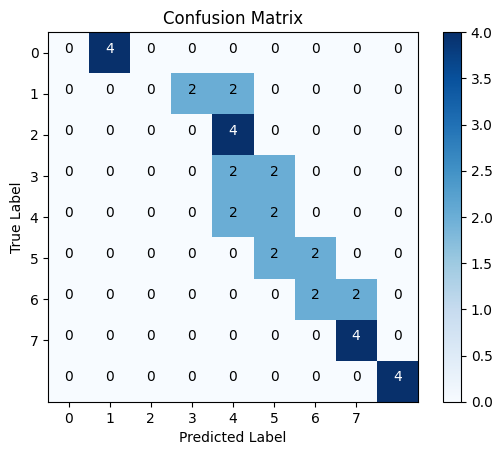

In [26]:
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
cm = confusion_matrix(test_labels, predicted_labels)

plt.imshow(cm, cmap='Blues')
plt.colorbar()
classes = ['0', '1', '2', '3', '4', '5', '6', '7']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [27]:
import numpy as np
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

# 计算分类报告
report = classification_report(test_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         4
           4       0.20      0.50      0.29         4
           5       0.33      0.50      0.40         4
           6       0.50      0.50      0.50         4
           7       0.67      1.00      0.80         4
           8       1.00      1.00      1.00         4

    accuracy                           0.39        36
   macro avg       0.30      0.39      0.33        36
weighted avg       0.30      0.39      0.33        36

